# MovieLens dataset report
## Prepare

In [1]:
from movielens_analysis import Movies, Links, Ratings, Tags, Statistics

In [2]:
MOVIES_CSV = 'ml-latest-small/movies.csv'
LINKS_CSV = 'ml-latest-small/links.csv'
RATINGS_CSV = 'ml-latest-small/ratings.csv'
TAGS_CSV = 'ml-latest-small/tags.csv'

## Movies analysis

### Distribution by release year

In [3]:
movies = Movies(MOVIES_CSV)

In [4]:
%timeit movies.dist_by_release()
dist_by_release = movies.dist_by_release()

tmp = list(dist_by_release.items())
for index in range(len(tmp)):
    print(f'{tmp[index][0]} : {tmp[index][1]}', end='\t')
#     df.merge(tmp[index])
    index += 1
    if index % 5 == 0:
        print()
        
        
# print('\n')

44.1 ms ± 7.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
2002 : 311	2006 : 295	2001 : 294	2007 : 284	2000 : 283	
2009 : 282	2003 : 279	2004 : 279	2014 : 278	1996 : 276	
2015 : 274	2005 : 273	2008 : 269	1999 : 263	1997 : 260	
1995 : 259	1998 : 258	2011 : 254	2010 : 247	2013 : 239	
1994 : 237	2012 : 233	2016 : 218	1993 : 198	1992 : 167	
1988 : 165	1987 : 153	1990 : 147	1991 : 147	2017 : 147	
1989 : 142	1986 : 139	1985 : 126	1984 : 101	1981 : 92	
1980 : 89	1982 : 87	1983 : 83	1979 : 69	1977 : 63	
1973 : 59	1978 : 59	1965 : 47	1971 : 47	1974 : 45	
1976 : 44	1964 : 43	1967 : 42	1968 : 42	1975 : 42	
1966 : 42	2018 : 41	1962 : 40	1972 : 39	1963 : 39	
1959 : 37	1960 : 37	1955 : 36	1969 : 35	1961 : 34	
1970 : 33	1957 : 33	1958 : 31	1953 : 30	1956 : 30	
1940 : 25	1949 : 25	1954 : 23	1942 : 23	1939 : 23	
1946 : 23	1951 : 22	1950 : 21	1947 : 20	1948 : 20	
1941 : 18	1936 : 18	1945 : 17	1937 : 16	1952 : 16	
1944 : 16	1938 : 15	1931 : 14	1935 : 13	1933 : 12	
1934 : 11	1943 : 10	1932 : 9

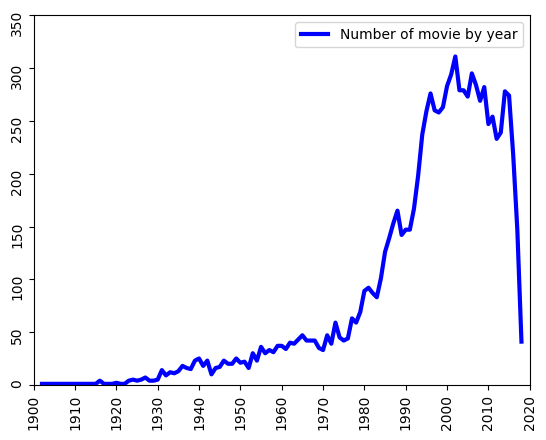

In [5]:
# положил данные в датафрейм
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

dict1 = dist_by_release.items()
df = pd.DataFrame(dict1)
# переименовал столбцы
df.columns = ['Year', 'Count']
df['Year'] = df['Year'].astype(str).astype(int)

# отсортировал по годам
df = df.sort_values(by=['Year'])

plt.plot(df['Year'], df['Count'], label="Number of movie by year", color ='blue', linewidth = 3)
plt.axis([1900, 2020, 0, 350])
plt.xticks(np.arange(1900, 2021,10))

plt.tick_params(labelrotation = 90)    #  Поворот подписей
plt.legend()
plt.show()

### Distribution of genres

In [6]:
%timeit movies.dist_by_genres()
movies = Movies(MOVIES_CSV)

for key, value in movies.dist_by_genres().items():
    print(f'{key:<20} : {value}')

print()

36 ms ± 2.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Drama                : 4361
Comedy               : 3756
Thriller             : 1894
Action               : 1828
Romance              : 1596
Adventure            : 1263
Crime                : 1199
Sci-Fi               : 980
Horror               : 978
Fantasy              : 779
Children             : 664
Animation            : 611
Mystery              : 573
Documentary          : 440
War                  : 382
Musical              : 334
Western              : 167
IMAX                 : 158
Film-Noir            : 87



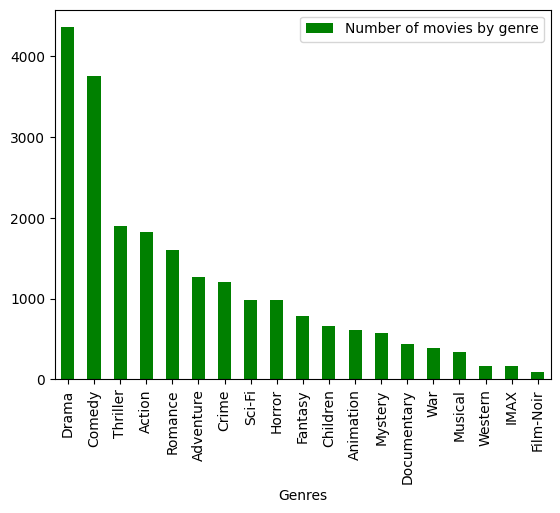

In [7]:
data = movies.dist_by_genres().items()
df = pd.DataFrame(data)
df.columns = ['Genres', 'Number']
df['Number'] = df['Number'].astype(str).astype(int)
df.plot.bar(x='Genres', y='Number', label="Number of movies by genre", color=('green'), width=0.5)
plt.show()


### 30 most genres films

In [8]:
%timeit movies.most_genres(30)
movies = Movies(MOVIES_CSV)

print(f'{"Film":<70}Ganres number')
for key, value in movies.most_genres(30).items():
    print(f'{key:<70}{value}')

print()

28.8 ms ± 803 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Film                                                                  Ganres number
Rubber (2010)                                                         10
Patlabor: The Movie (Kidô keisatsu patorebâ: The Movie) (1989)        8
Mulan (1998)                                                          7
Who Framed Roger Rabbit? (1988)                                       7
Osmosis Jones (2001)                                                  7
Interstate 60 (2002)                                                  7
Robots (2005)                                                         7
Pulse (2006)                                                          7
Aqua Teen Hunger Force Colon Movie Film for Theaters (2007)           7
Enchanted (2007)                                                      7
Aelita: The Queen of Mars (Aelita) (1924)                             7
Inception (2010)                                     

## Links analysis

### Get imdb information

In [9]:
from movielens_analysis import Movies, Links, Ratings, Tags, Statistics
LINKS_CSV = 'ml-latest-small/links.csv'
links = Links(LINKS_CSV)

In [ ]:
%timeit links.get_imdb([1, 2, 3, 4], ['directors', 'wins', 'productionBudget', 'lifetimeGross', 'runtime'])
print()

fields = ['directors', 'wins', 'productionBudget', 'lifetimeGross', 'runtime']
imdb_info = links.get_imdb([1, 3, 5, 7, 15], fields)

print(f'{"MovieID":<16}{"Directors":<24}{"Wins":<15} {"Budget":<23} {"Gross":<23} {"RunTime":<15}')
for movie in imdb_info:
    print(*movie, sep='\t\t')

### Top directors

In [ ]:
%timeit -r 1 -n 1 links.top_directors(7)
print()

top_directors = links.top_directors(7)

# print(len(top_directors))

print(f'{"Director":<20}Films count')
for key, value in top_directors.items():
    if key is None:
        key = 'Null'
    print(f'{key:<20}{value}')

### Most expensive films

In [ ]:
%timeit links.most_expensive(7)
print()

most_expensive = links.most_expensive(7)

print(f'{"Film":<80}Budget')
for key, value in most_expensive.items():
    print(f'{key:<80}{value}')

### Most profitable films

In [ ]:
%timeit links.most_profitable(7)
print()

most_profitable = links.most_profitable(7)

print(f'{"Film":<80}Profit')
for key, value in most_profitable.items():
    print(f'{key:<80}{value}')

### Longest films

In [ ]:
%timeit links.longest(7)
print()

longest = links.longest(7)

print(f'{"Film":<80}Runtime')
for key, value in longest.items():
    print(f'{key:<80}{value}')

### Cost per unit top

In [ ]:
%timeit links.top_cost_per_minute(7)
print()

top_cost_per_minute = links.top_cost_per_minute(20)

print(f'{"Film":<80}Cost per minute')
for key, value in top_cost_per_minute.items():
    print(f'{key:<80}{value}')

## Top winners

In [ ]:
%timeit links.top_winners(7)
print()

top_winners = links.top_winners(7)

print(f'{"Film":<60}Number of Awards')
for key, value in top_winners.items():
    print(f'{key:<60}{value}')

## ROC

In [ ]:
%timeit links.top_ROC_in_prct(7)
print()

top_ROC = links.top_ROC_in_prct(7)

print(f'{"Film":<60}Return On Costs')
for key, value in top_ROC.items():
    print(f'{key:<60}{value}')

## Ratings.Movies analysis
### Distribution of ratings count by year

In [ ]:
ratings = Ratings(RATINGS_CSV)
movies_ratings = Ratings.Movies(ratings, movies)

In [ ]:
%timeit movies_ratings.dist_by_year()
dist_by_year = movies_ratings.dist_by_year()

print(f'{"Year":<6}Ratings count')
for key, value in dist_by_year.items():
    print(f'{key:<10}{value}')

### Distribution of ratings count by rating value

In [ ]:
%timeit movies_ratings.dist_by_rating()
dist_by_rating = movies_ratings.dist_by_rating()
print()
print(f'{"Rating value":<15}Ratings count')
for key, value in dist_by_rating.items():
    print(f'{key:<15}{value}')

### Distribution of ratings count by num of ratings

In [ ]:
%timeit movies_ratings.top_by_num_of_ratings(10)
print()
num_of_rating = movies_ratings.top_by_num_of_ratings(10)

print(f'{"Movie title":<50}Num of ratings')
for key, value in num_of_rating.items():
    print(f'{key:<50}{value}')

### Top movies by rating (average)

In [ ]:
%timeit movies_ratings.top_by_ratings(20)
top_by_ratings = movies_ratings.top_by_ratings(20)

print(f'{"Movie":<75}Average rating')
for key, value in top_by_ratings.items():
    print(f'{key:<75}{value}')

### Top movies by rating (median)

In [ ]:
%timeit movies_ratings.top_by_ratings(20, metric=Statistics.median)
top_by_ratings = movies_ratings.top_by_ratings(20, metric=Statistics.median)
print()
print(f'{"Movie":<75}Median rating')
for key, value in top_by_ratings.items():
    print(f'{key:<75}{value}')

### Top controversial movies

In [ ]:
%timeit movies_ratings.top_controversial(30)
print()
top_controversial = movies_ratings.top_controversial(30)

print(f'{"Movie":<75}Rating variance')
for key, value in top_controversial.items():
    print(f'{key:<75}{value}')

## Ratings.Users analysis
### Distribution of users by ratings count

In [ ]:
users_ratings = Ratings.Users(ratings, movies)

In [ ]:
%timeit users_ratings.dist_by_ratings_number()
print()
dist_by_ratings_number = users_ratings.dist_by_ratings_number()

print(f'{"User":<8}Number of ratings')
for key, value in dist_by_ratings_number.items():
    print(f'{key:<8}{value}')

### Distribution of users by ratings values (average)

In [ ]:
%timeit users_ratings.dist_by_ratings_values()
print()
dist_by_ratings_values = users_ratings.dist_by_ratings_values()

print(f'{"User":<8}Average rating value')
for key, value in dist_by_ratings_values.items():
    print(f'{key:<8}{value}')

### Distribution of users by ratings values (median)

In [ ]:
%timeit users_ratings.dist_by_ratings_values(metric=Statistics.median)
print()
dist_by_ratings_values = users_ratings.dist_by_ratings_values(metric=Statistics.median)

print(f'{"User":<8}Median of rating value')
for key, value in dist_by_ratings_values.items():
    print(f'{key:<8}{value}')

### Top of users by variance of their ratings

In [ ]:
%timeit users_ratings.top_by_variance(30)
print()
top_by_variance = users_ratings.top_by_variance(30)

print(f'{"User":<8}Variance of ratings')
for key, value in top_by_variance.items():
    print(f'{key:<8}{value}')

## Tags analysis

### Most words

In [ ]:
tags = Tags(TAGS_CSV)

In [ ]:
%timeit tags.most_words(30)
print()
dist_by_release = tags.most_words(30)

print(f'{"Tag":<90}Number of words')
for key, value in dist_by_release.items():
    print(f'{key:<90}{value}')

### Longest

In [ ]:
%timeit tags.longest(30)
print()
longest = tags.longest(30)

print('Tag\n---------')
for tag in longest:
    print(tag)

### Most words and longest

In [ ]:
%timeit tags.most_words_and_longest(30)
print()
most_words_and_longest = tags.most_words_and_longest(30)

print('Tag\n---------')
for tag in most_words_and_longest:
    print(tag)

#нужно ли отсортировать по длине?

### Most popular

In [ ]:
%timeit tags.most_popular(20)
print()
most_popular = tags.most_popular(20)

print(f'{"Tag":<30}Usage number')
for key, value in most_popular.items():
    print(f'{key:<30}{value}')

### Tags with (some word)

In [ ]:
word_for_tag = 'history' #тут можно подставить нужное слово

%timeit tags.tags_with(word_for_tag)
print()

tags_with = tags.tags_with(word_for_tag)

print(f'Tags with {word_for_tag}\n---------')
for tag in tags_with:
    print(tag)